PYTHON CHO KHOA HỌC DỮ LIỆU \
**FINAL PROJECT - MOVIE RECOMMENDATION SYSTEM**
---

**Giới thiệu thành viên**

| MSSV     | Họ Tên                | Công Việc                                          |
|----------|-----------------------|----------------------------------------------------|
| 22110170 | Hồ Minh Quân          |Data Preprocessing<br><br> Data Visualization      |
| 22110123<br><br>22110124 | Lê Nguyễn Đức Nam<br><br>Lê Thị Kim Nga |  2 Model: Weighted Rating & Content-based <br><br>2 Model: Collaborative Filtering & Hybrid                  |
| 22110155 | Trần Nguyễn Thanh Phong   |  Data Exploration<br><br> Data Preprocessing                |
| 22110158 | Trần Châu Phú         | Deploy model on website |

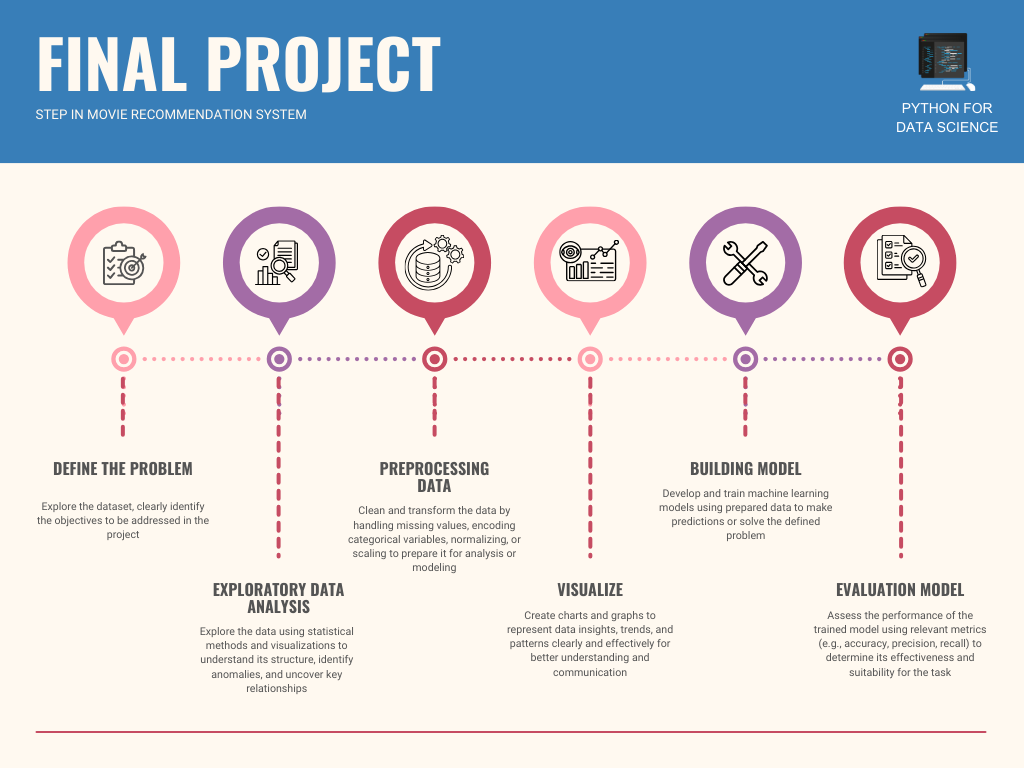

# **DEFINE THE PROBLEM**

**About dataset**
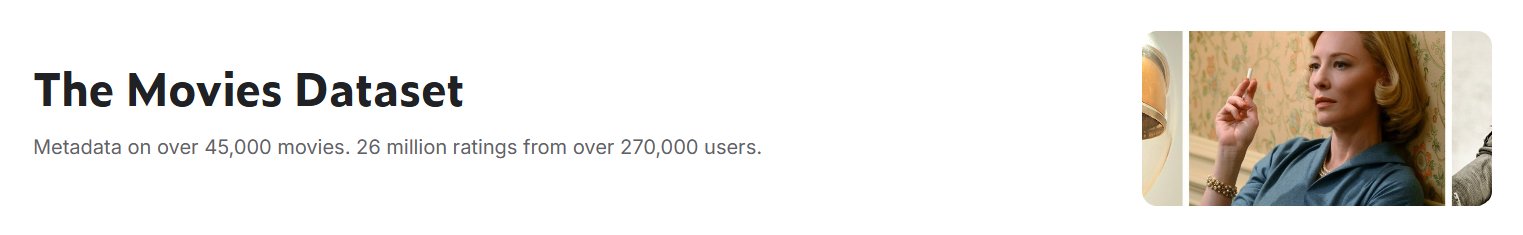

**Link:** https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

**Bối cảnh**

Những tập tin này chứa thông tin về metadata cho tất cả 45,000 bộ phim được liệt kê trong Bộ dữ liệu Full MovieLens. Bộ dữ liệu này bao gồm các bộ phim được phát hành vào hoặc trước tháng 7 năm 2017. Các điểm dữ liệu bao gồm diễn viên, đoàn làm phim, từ khóa cốt truyện, ngân sách, doanh thu, poster, ngày phát hành, ngôn ngữ, công ty sản xuất, quốc gia, số lượng phiếu bầu TMDB và điểm bình chọn trung bình TMDB.

Bộ dữ liệu này cũng chứa các tập tin chứa 26 triệu đánh giá từ 270,000 người dùng cho tất cả 45,000 bộ phim. Đánh giá được đưa ra trên một thang điểm từ 1-5 và đã được thu thập từ trang web chính thức của GroupLens.

**Nội dung**

Bộ dữ liệu này bao gồm các tập tin sau:

- movies_metadata.csv: Tệp chính chứa thông tin về metadata của 45,000 bộ phim trong Bộ dữ liệu Full MovieLens. Các đặc điểm bao gồm poster, hình nền, ngân sách, doanh thu, ngày phát hành, ngôn ngữ, quốc gia sản xuất và công ty.

- keywords.csv: Chứa các từ khóa cốt truyện cho các bộ phim MovieLens của chúng tôi. Có sẵn dưới dạng một Object JSON được chuỗi hóa.

- credits.csv: Bao gồm thông tin về Diễn viên và Đoàn làm phim cho tất cả các bộ phim của chúng tôi. Có sẵn dưới dạng một Object JSON được chuỗi hóa.

- ratings.csv: Đánh giá của người dùng.

# **Exploratory Data Analysis**

## Import module

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
#import missingno as msno
from collections import Counter
import warnings; warnings.simplefilter('ignore')

## Load dataset

The Full Dataset: Consists of 26,000,000 ratings and 750,000 tag applications applied to 45,000 movies by 270,000 users. Includes tag genome data with 12 million relevance scores across 1,100 tags.

In [ ]:
df_movies = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')
df_credits = pd.read_csv('/content/drive/MyDrive/credits.csv')
df_keywords = pd.read_csv('/content/drive/MyDrive/keywords.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')

### movie_metadata dataframe

In [ ]:
df_movies.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [ ]:
df_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Feature**  

- adult: Cho biết nếu bộ phim có phân loại X-Rated hoặc dành cho người trưởng thành.

- belongs_to_collection: Một từ điển được chuyển thành chuỗi, cung cấp thông tin về loạt phim mà bộ phim cụ thể đó thuộc về.

- budget: Ngân sách của bộ phim tính bằng đô la.

- genres: Một danh sách được chuyển thành chuỗi, liệt kê tất cả các thể loại liên quan đến bộ phim.

- homepage: Trang chính thức của bộ phim.

- id: ID của bộ phim.

- imdb_id: ID của bộ phim trên trang web IMDB.

- original_language: Ngôn ngữ mà bộ phim được quay ban đầu.

- original_title: Tiêu đề gốc của bộ phim.

- overview: Một đoạn mô tả ngắn về bộ phim.

- popularity: Điểm Popularity được gán bởi TMDB.

- poster_path: Đường dẫn URL đến hình ảnh poster.

- production_companies: Một danh sách được chuyển thành chuỗi, liệt kê các công ty sản xuất tham gia vào việc làm phim.

- production_countries: Một danh sách được chuyển thành chuỗi, liệt kê các quốc gia nơi bộ phim được quay/sản xuất.

- release_date: Ngày phát hành trong các rạp chiếu phim.

- revenue: Tổng doanh thu của bộ phim tính bằng đô la.

- runtime: Thời lượng của bộ phim tính bằng phút.

- spoken_languages: Một danh sách được chuyển thành chuỗi, liệt kê các ngôn ngữ được sử dụng trong phim.

- status: Tình trạng của bộ phim (Released, To Be Released, Announced, v.v.).

- tagline: Câu khẩu hiệu của bộ phim.

- title: Tiêu đề chính thức của bộ phim.

- video: Cho biết liệu có video của bộ phim trên TMDB hay không.

- vote_average: Điểm đánh giá trung bình của bộ phim.

- vote_count: Số lượng phiếu bầu của người dùng, được đếm bởi TMDB.

In [ ]:
df_movies.shape

(45466, 24)

Có tất cả 45466 dòng và 24 cột

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
def most_common_element_in_categorical_columns(df):
    # Finding the most common element in each categorical columns of DataFrame and return DataFrame.
    data = {'Column': [], 'Most Common Element': [], 'Count': []}

    for column in df.select_dtypes(include='object').columns:
        all_values = [value for value in df[column]]
        value_counter = Counter(all_values)
        most_common_value, count = value_counter.most_common(1)[0]
        data['Column'].append(column)
        data['Most Common Element'].append(most_common_value)
        data['Count'].append(count)

    result_df = pd.DataFrame(data).set_index('Column')
    print("Phần tử xuất hiện nhiều nhất trong mỗi cột categorical:")
    return result_df
def plot_missing_values(df):
    # visualizing missing values
    plt.figure(figsize=(30,20))
    plt.subplot(234)
    sns.heatmap(pd.DataFrame(df.isnull().mean() * 100),annot=True,cmap='viridis',linewidths=1,linecolor="white")
    plt.title("Missing Value")
def plot_correlation_heatmap(df):
    # Tính ma trận tương quan
    correlation_matrix = df.corr()

    # Vẽ biểu đồ nhiệt độ (heatmap) của ma trận tương quan
    plt.figure(figsize=(12, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
    plt.title('Biểu đồ tương quan')
    plt.show()

In [ ]:
most_common_element_in_categorical_columns(df_movies)

Phần tử xuất hiện nhiều nhất trong mỗi cột categorical:


,Most Common Element,Count
Column,,
adult,False,45454
belongs_to_collection,NaN,40972
budget,0,36573
genres,"[{'id': 18, 'name': 'Drama'}]",5000
homepage,NaN,37684
id,141971,3
imdb_id,NaN,17
original_language,en,32269
original_title,Alice in Wonderland,8


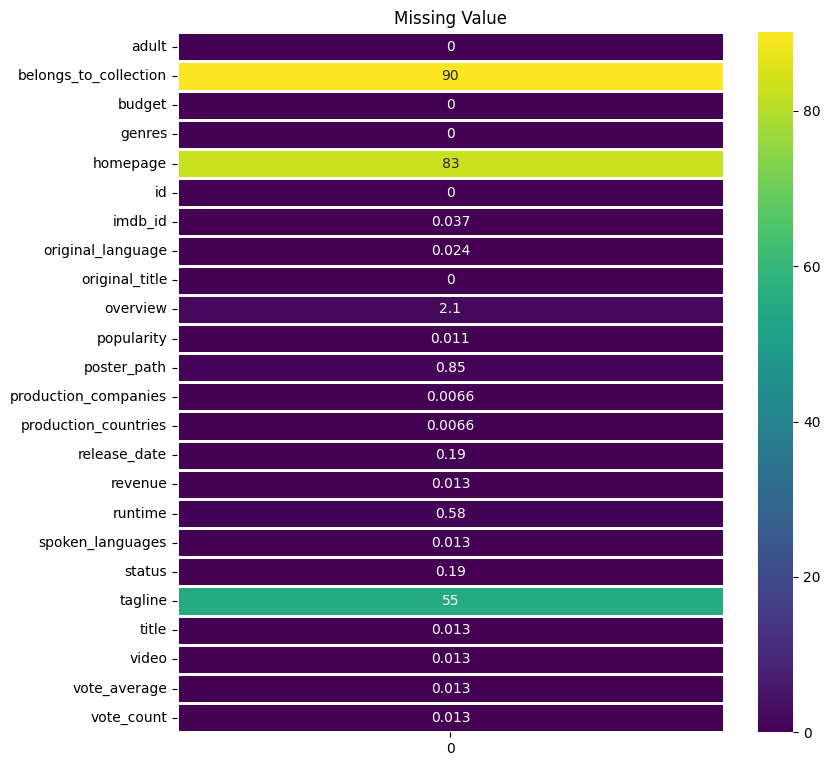

In [ ]:
plot_missing_values(df_movies)

- Có hơn 50% bộ phim không có câu khẩu hiệu "tagline" ban đầu
- Hơn 80% bộ phim không có "homepage" và "belongs_to_collection"
- Một vài bộ phim không có thông tin công ty tham gia sản xuất phim "production_companies". Ở đây ký hiệu [] được dùng để thay thế cho giá trị trống NaN

In [ ]:
df_columns = df_movies.select_dtypes(include=['float64'])
df_adj_movies = df_columns.copy()

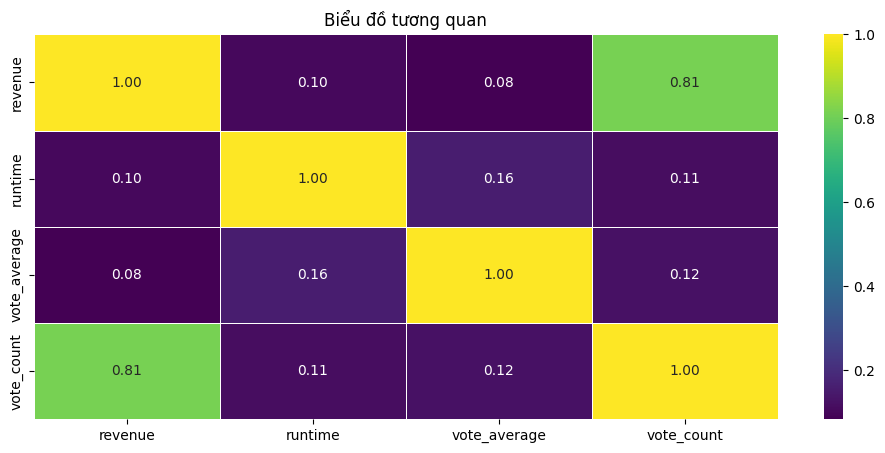

In [ ]:
plot_correlation_heatmap(df_adj_movies)

**Tương quan giữa 'vote_count' và 'revenue':**  
- Độ tương quan giữa 'vote count' và 'revenue' là 0.81, điều này cho thấy có một mối tương quan tuyến tính mạnh giữa hai biến này. Giá trị 0.81 gần với 1, điều này chỉ ra rằng khi số lượng phiếu bầu ('vote count') tăng, doanh thu ('revenue') cũng có xu hướng tăng, và ngược lại.
- Mối tương quan mạnh này có thể được hiểu là:
  - Khi một bộ phim nhận được nhiều phiếu bầu, nó có thể thu hút sự chú ý và sự quan tâm từ khán giả, điều này có thể dẫn đến tăng cường doanh thu từ việc mọi người xem bộ phim.
  - Tuy nhiên, cần lưu ý rằng tương quan không có nghĩa là mối quan hệ nhân quả và không giải thích nguyên nhân của mối quan hệ này. Có thể có nhiều yếu tố khác nhau đồng thời ảnh hưởng đến cả 'vote count' và 'revenue'.

**Tương quan giữa 'vote_count' và 'vote_average':**  
- Giá trị 0.12 có thể chỉ ra rằng số lượng phiếu bầu ('vote count') không có tương quan mạnh với điểm đánh giá trung bình ('vote average'). Điều này có thể xảy ra khi một bộ phim có thể thu hút một số lượng lớn phiếu bầu nhưng có thể không nhất thiết có điểm đánh giá cao.
- Có thể có nhiều yếu tố khác nhau đóng vai trò trong quyết định của người xem khi đánh giá một bộ phim, không chỉ là lượng phiếu bầu.

**Tương quan giữa 'revenue' và 'vote_average':**  
- Giá trị 0.08 chỉ ra rằng doanh thu ('revenue') cũng không có tương quan mạnh với điểm đánh giá trung bình ('vote average'). Điều này có thể xảy ra khi một bộ phim có thể kiếm được nhiều doanh thu mà không nhất thiết phải có điểm đánh giá cao từ người xem.
- Một bộ phim có thể có doanh thu lớn do các yếu tố khác như chiến lược tiếp thị, dàn diễn viên nổi tiếng hoặc quảng cáo mạnh mẽ, mà không cần phải có sự đồng thuận cao từ người xem.

### credits dataframe

In [ ]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
df_credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

**Feature**  
- cast: Thông tin về diễn viên. Tên diễn viên, giới tính và tên nhân vật mà họ đóng trong phim.

- crew: Thông tin về các thành viên đoàn làm phim. Chẳng hạn như người đạo diễn, biên tập viên và các vị trí khác.

- id: Đây là ID của bộ phim được cung cấp bởi TMDb (The Movie Database).

In [ ]:
df_credits.shape

(45476, 3)

In [ ]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
most_common_element_in_categorical_columns(df_credits)

Phần tử xuất hiện nhiều nhất trong mỗi cột categorical:


,Most Common Element,Count
Column,,
cast,[],2418
crew,[],771


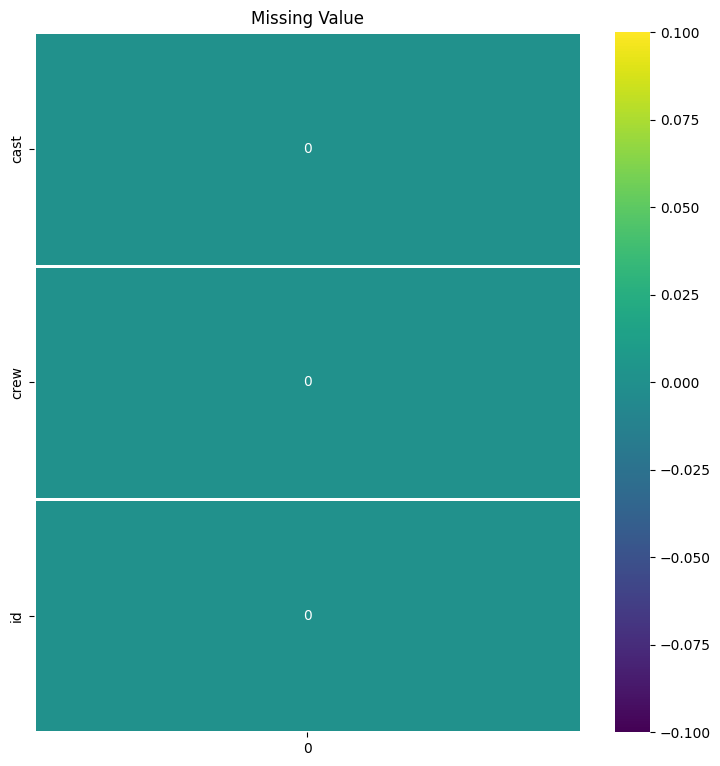

In [ ]:
plot_missing_values(df_credits)

Có nhiều dữ liệu [] trong cả 2 cột "cast" và "crew".  Điều này có thể xảy ra do trong quá trình thu thập dữ liệu, dữ liệu về diễn viên đoàn phim có thể không đầy đủ hoặc không chính xác

### keywords dataframe

In [ ]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
df_keywords.columns

Index(['id', 'keywords'], dtype='object')

**Feature**  
- id: Đây là ID của bộ phim được cung cấp bởi TMDb (The Movie Database).

- keywords: Tags/keywords cho bộ phim. Đây là danh sách các từ khóa hoặc thẻ mô tả nội dung hoặc chủ đề của bộ phim.

In [ ]:
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [ ]:
df_keywords.shape

(46419, 2)

In [ ]:
most_common_element_in_categorical_columns(df_keywords)

Phần tử xuất hiện nhiều nhất trong mỗi cột categorical:


,Most Common Element,Count
Column,,
keywords,[],14795


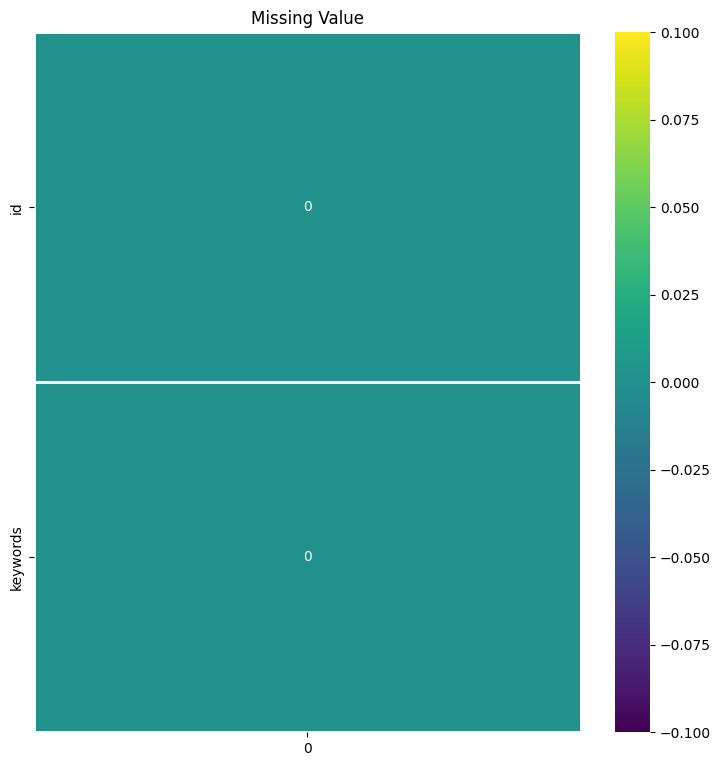

In [ ]:
plot_missing_values(df_keywords)

### ratings dataframe

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

**Feature**  
- userId: Đây là ID của người dùng.

- movieId: Đây là ID của bộ phim trên TMDb (The Movie Database).

- rating: Đánh giá được người dùng cụ thể đưa ra cho bộ phim tương ứng.

- timestamp: Thời điểm (timestamp) khi người dùng đưa ra đánh giá cho bộ phim.

In [ ]:
df_ratings.shape

(100004, 4)

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# In ra 100 'title' được xếp theo thứ tự 'id' tăng dần
sorted_df = df_movies.sort_values(by='id')
selected_columns = ['title', 'vote_average', 'vote_count', 'runtime', 'release_date']
result_df = sorted_df[selected_columns].head(100)
result_df

,title,vote_average,vote_count,runtime,release_date
2429,"Lock, Stock and Two Smoking Barrels",7.5,1671.0,105.0,1998-03-05
13609,La estrategia del caracol,7.2,9.0,116.0,1993-12-25
4435,Young Einstein,4.5,46.0,91.0,1988-12-15
17451,Flight Command,6.0,1.0,116.0,1940-12-27
36946,Hounded,4.8,7.0,87.0,2006-08-06
...,...,...,...,...,...
4042,Get Over It,5.5,76.0,87.0,2001-03-08
11700,Avenue Montaigne,6.2,27.0,106.0,2006-02-15
4996,Dragonfly,6.2,209.0,104.0,2002-02-22
12373,Thunder Rock,7.3,3.0,112.0,1942-12-04


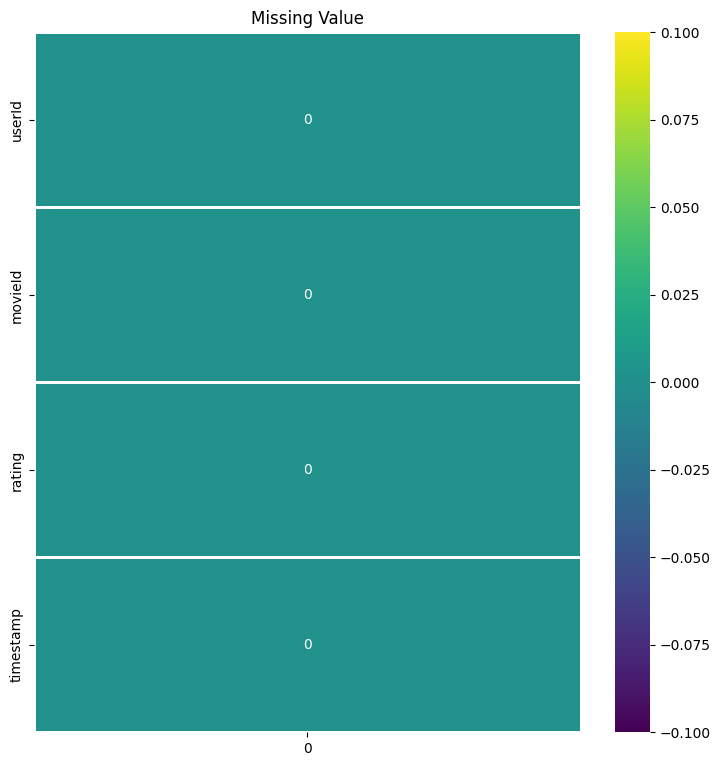

In [ ]:
plot_missing_values(df_ratings)

In [ ]:
df=df_ratings

# Chuyển đổi cột 'timestamp' sang kiểu dữ liệu ngày giờ
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Giả sử 'timestamp' đang ở đơn vị giây

# Tách cột 'timestamp' thành 'ngày' và 'giờ'
df['day'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time
df['hour'] = df['timestamp'].dt.hour

In [ ]:
df.head()

,userId,movieId,rating,timestamp,day,time,hour
0,1,31,2.5,2009-12-14 02:52:24,2009-12-14,02:52:24,2
1,1,1029,3.0,2009-12-14 02:52:59,2009-12-14,02:52:59,2
2,1,1061,3.0,2009-12-14 02:53:02,2009-12-14,02:53:02,2
3,1,1129,2.0,2009-12-14 02:53:05,2009-12-14,02:53:05,2
4,1,1172,4.0,2009-12-14 02:53:25,2009-12-14,02:53:25,2


Text(0.5, 0, 'Giờ trong ngày')

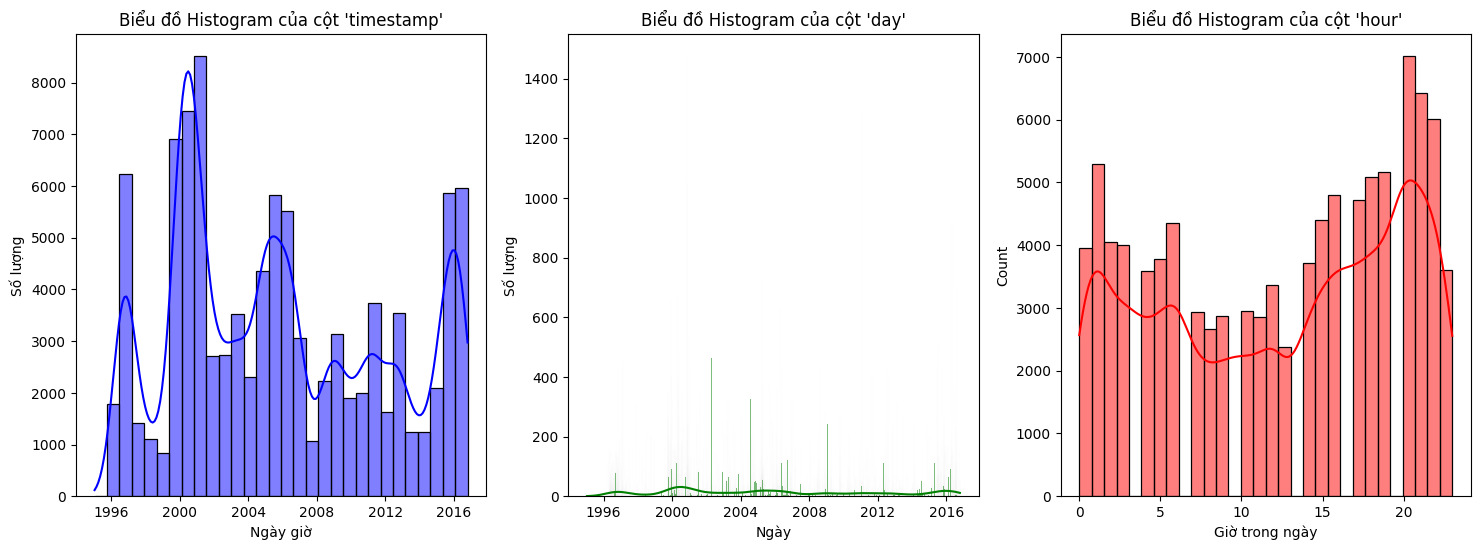

In [ ]:

# Tạo subplot cho cột 'timestamp', 'day', và 'hour'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Biểu đồ histogram cho cột 'timestamp'
sns.histplot(df['timestamp'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Biểu đồ Histogram của cột 'timestamp'")
axes[0].set_xlabel('Ngày giờ')
axes[0].set_ylabel('Số lượng')

# Biểu đồ histogram cho cột 'day'
sns.histplot(df['day'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title("Biểu đồ Histogram của cột 'day'")
axes[1].set_xlabel('Ngày')
axes[1].set_ylabel('Số lượng')

# Biểu đồ histogram cho cột 'hour'
sns.histplot(df['hour'], bins=30, kde=True, color='red', ax=axes[2])
axes[2].set_title("Biểu đồ Histogram của cột 'hour'")
axes[2].set_xlabel('Giờ trong ngày')


Dựa trên phân phối thời gian của ngày giờ xem phim, bạn có thể đưa ra những nhận xét hợp lý về thói quen xem phim của người dùng. Dưới đây là một số nhận xét có thể áp dụng:

Khung giờ xem phim: Nếu có một đỉnh lớn tại các giờ tối, có thể người xem thường xem phim vào buổi tối sau khi kết thúc công việc hoặc các hoạt động hàng ngày. Điều này có thể phản ánh thói quen giải trí sau giờ làm việc.

Mùa trong năm: Nếu có sự tăng đột ngột trong lượng xem phim ở cuối năm hoặc mùa hè, có thể đó là thời điểm mà người xem thường có nhiều thời gian rảnh hơn, chẳng hạn như trong kỳ nghỉ lễ hoặc kỳ nghỉ mùa hè.

Ngày trong tuần: Bạn cũng có thể xem xét thói quen xem phim trong các ngày cụ thể của tuần. Có thể có sự gia tăng vào cuối tuần khi mọi người có nhiều thời gian rảnh hơn so với các ngày trong tuần.

# **Preprocessing Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from ast import literal_eval
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

## movie_metadata dataframe

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv',encoding='utf-8')
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

**Year**

In [ ]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['release_year'] = movies['release_date'].dt.year

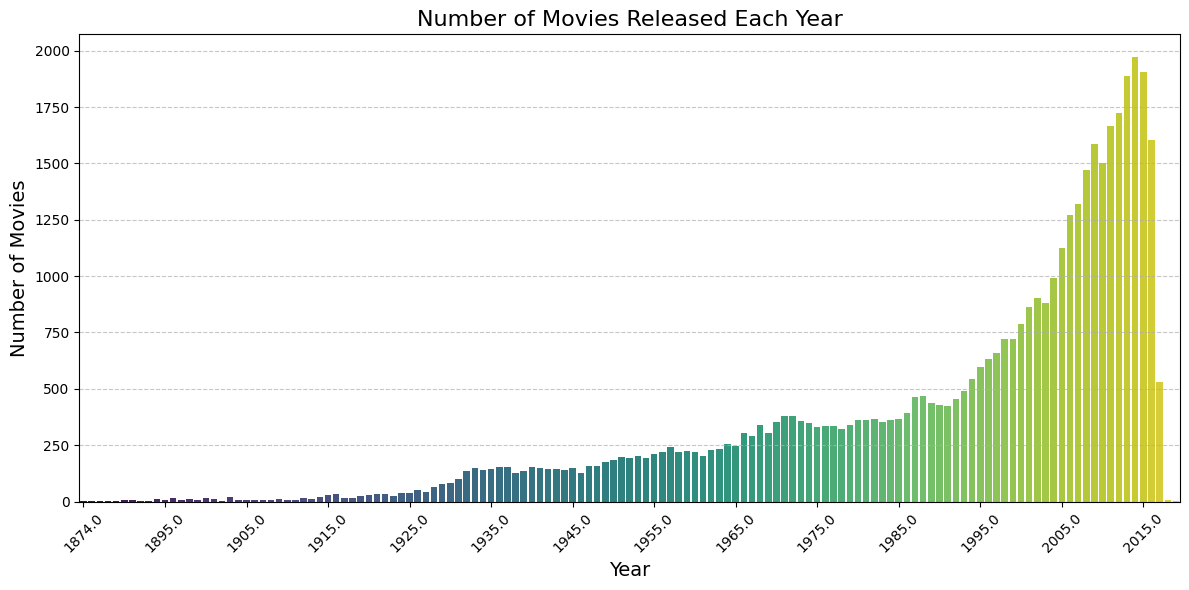

In [ ]:
movie_counts = movies['release_year'].value_counts().sort_index()

# Tạo biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=movie_counts.index, y=movie_counts.values, palette="viridis")

# Cài đặt các thông số biểu đồ
plt.title('Number of Movies Released Each Year', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Number of Movies', fontsize=14, color='black')

# Lấy chỉ số đại diện cho trục X (mỗi 10 năm)
xticks = movie_counts.index[::10]  # Lấy mỗi 10 năm
plt.xticks(ticks=range(0, len(movie_counts), 10), labels=xticks, rotation=45, fontsize=10, color='black')

plt.yticks(fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
movies['release_year'].value_counts().sort_index()

,count
release_year,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
...,...
2015.0,1905
2016.0,1604
2017.0,532


**Adult**

In [ ]:
print(*(i for i in movies['adult'].unique()), sep="\n")

False
True
 - Written by Ørnås
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.


Ánh xạ chuỗi 'True' hoặc 'False' trong meta['adult'] về thành kiểu boolean.

Nếu meta['adult'] không phải True hoặc False thì drop do dòng đó các giá trị trong dòng đó đảo lộn trật tự

In [ ]:
movies['adult'] = movies['adult'].map({'True': True, 'False': False})
movies.drop(movies[~movies['adult'].isin([True, False])].index, inplace=True)

**original_language**

In [ ]:
movies['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [ ]:
(movies['original_language']== 'en').sum()

32269

Chỉ lựa chọn những bộ phim bằng tiếng Anh

**Status & Video**

In [ ]:
movies['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [ ]:
print(*(i for i in movies['video'].unique()), sep="\n")

False
True
nan


**Budget, runtime, popularity, revenue, vote_count, vote_average**

với budget <= 0 chuyển thành np.nan làm tương tự với runtime, popularity, revenue, vote_count, vote_average

In [ ]:
movies['budget'] = movies['budget'].astype(str).apply(lambda x: int(x) if x.isdigit() else np.nan)
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

In [ ]:
list_cols=['budget','runtime','popularity','revenue','vote_count','vote_average']
for i in list_cols:
    movies.loc[movies[i] <= 0, i] = np.nan

**genres**

In [ ]:
movies['genres_list'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies['genres_list'] = movies['genres_list'].apply(lambda x: x if x else ['other'])

**production_companies & production_countries**

In [ ]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies['production_countries'] = movies['production_countries'].apply(lambda x: x if x else ['other'])

movies['production_companies'] = movies['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies['production_companies'] = movies['production_companies'].apply(lambda x: x if x else ['other'])

**New data**

In [ ]:
movies.isnull().sum()

NameError: name 'movies' is not defined

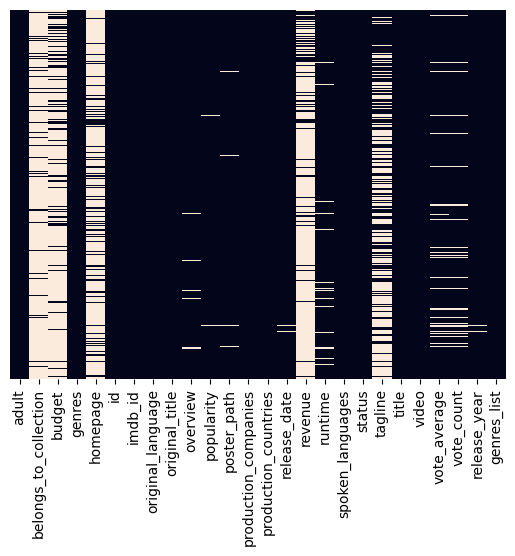

In [ ]:
_ = sns.heatmap(movies.isnull(), yticklabels=False, cbar=False)

In [ ]:
new = movies.drop(columns = ['imdb_id', 'adult', 'video', 'status', 'belongs_to_collection','budget', 'homepage', 'original_title', 'overview', 'spoken_languages', 'tagline', 'release_date', 'original_language', 'poster_path', 'revenue', 'genres'])
new.head()

,id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,release_year,genres_list
0,862,21.946943,[Pixar Animation Studios],[United States of America],81.0,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]"
1,8844,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]"
2,15602,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]"
3,31357,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,Waiting to Exhale,6.1,34.0,1995.0,"[Comedy, Drama, Romance]"
4,11862,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,Father of the Bride Part II,5.7,173.0,1995.0,[Comedy]


## credits dataframe

In [ ]:
credits = pd.read_csv('/content/drive/MyDrive/credits.csv', encoding='utf-8')
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


**Actors**

In [ ]:
from ast import literal_eval
credits['actor'] = credits['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x[:5]] if isinstance(x, list) else [])
credits['actor'] = credits['actor'].apply(lambda x: x if x else ['unknown'])

**Director**

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return ['unknown']

In [ ]:
credits['director_name'] = credits['crew'].apply(literal_eval).map(lambda x: get_director(x))

**New dataframe**

In [ ]:
credits = credits.drop(columns = ['cast','crew'])
credits.head()

,id,actor,director_name
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


## keywords dataframe

In [ ]:
keywords=pd.read_csv('/content/drive/MyDrive/keywords.csv')
keywords=keywords.drop_duplicates(subset='id', keep='first')
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [ ]:
keywords['keywords'] = keywords['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
keywords['keywords'] = keywords['keywords'].apply(lambda x: x if x else ['other'])
keywords

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...
46414,439050,[tragic love]
46415,111109,"[artist, play, pinoy]"
46416,67758,[other]
46417,227506,[other]


## Full data

In [ ]:
new['id'] = movies['id'].astype(int)
merge_movies = pd.merge(new, credits, on='id', how='inner')
merge_movies = pd.merge(merge_movies, keywords, on='id', how='inner')
merge_movies.drop_duplicates(subset='id', keep='first', inplace=True)
merge_movies

,id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,release_year,genres_list,actor,director_name,keywords
0,862,21.946943,[Pixar Animation Studios],[United States of America],81.0,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'..."
2,15602,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,Waiting to Exhale,6.1,34.0,1995.0,"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin..."
4,11862,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,Father of the Bride Part II,5.7,173.0,1995.0,[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,439050,0.072051,[other],[Iran],90.0,Subdue,4.0,1.0,NaN,"[Drama, Family]","[Leila Hatami, Kourosh Tahami, Elham Korda]",Hamid Nematollah,[tragic love]
45534,111109,0.178241,[Sine Olivia],[Philippines],360.0,Century of Birthing,9.0,3.0,2011.0,[Drama],"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",Lav Diaz,"[artist, play, pinoy]"
45535,67758,0.903007,[American World Pictures],[United States of America],90.0,Betrayal,3.8,6.0,2003.0,"[Action, Drama, Thriller]","[Erika Eleniak, Adam Baldwin, Julie du Page, J...",Mark L. Lester,[other]
45536,227506,0.003503,[Yermoliev],[Russia],87.0,Satan Triumphant,NaN,NaN,1917.0,[other],"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",Yakov Protazanov,[other]


In [ ]:
merge_movies.isnull().sum()

,0
id,0
popularity,69
production_companies,0
production_countries,0
runtime,1817
title,3
vote_average,2997
vote_count,2898
release_year,87
genres_list,0


In [ ]:
merge_movies = merge_movies.dropna()
merge_movies

,id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,release_year,genres_list,actor,director_name,keywords
0,862,21.946943,[Pixar Animation Studios],[United States of America],81.0,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'..."
2,15602,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,Waiting to Exhale,6.1,34.0,1995.0,"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin..."
4,11862,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,Father of the Bride Part II,5.7,173.0,1995.0,[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45530,289923,0.386450,"[Neptune Salad Entertainment, Pirie Productions]",[United States of America],30.0,The Burkittsville 7,7.0,1.0,2000.0,[Horror],"[Monty Bane, Lucy Butler, David Grammer, Bill ...",Ben Rock,"[witch, mythology, legend, serial killer, mock..."
45531,222848,0.661558,[Concorde-New Horizons],[United States of America],85.0,Caged Heat 3000,3.5,1.0,1995.0,[Science Fiction],"[Lisa Boyle, Kena Land, Zaneta Polard, Don Yan...",Aaron Osborne,[other]
45532,30840,5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State...",104.0,Robin Hood,5.7,26.0,1991.0,"[Drama, Action, Romance]","[Patrick Bergin, Uma Thurman, David Morrissey,...",John Irvin,[other]
45534,111109,0.178241,[Sine Olivia],[Philippines],360.0,Century of Birthing,9.0,3.0,2011.0,[Drama],"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",Lav Diaz,"[artist, play, pinoy]"


In [ ]:
merge_movies.to_csv('/content/drive/MyDrive/data.csv', index=False)

# **Visualize**

In [ ]:
def get_counts(data, col):
    counts = {}
    for _, row in data.iterrows():
        if isinstance(row[col], list):
            genres = row[col]
            for genre in genres:
                if genre in counts:
                    counts[genre] += 1
                else:
                    counts[genre] = 1
    return counts

In [ ]:
# Get the base counts of each category and sort them by counts
base_counts = get_counts(merge_movies, 'genres_list')
base_counts = pd.DataFrame(index=base_counts.keys(), data=base_counts.values(), columns=['Counts'])
base_counts.sort_values(by='Counts', inplace=True)

# Plot the chart which shows top genres and separate by color where genre<1000
colors = ['#abaeab' if count < 1000 else '#A0E045' for count in base_counts['Counts']]
fig = px.bar(x=base_counts.index, y=base_counts['Counts'], title='Most Popular Genre', color_discrete_sequence=colors, color=base_counts.index)
fig.show()

**Nhận xét:**

1. Có 21 thể loại phim khác nhau trong khi có một số ít thể loại chưa được đề cập đến.
2. Drama, Comedy, Thriller, Romance, Action là 5 thể loại phim được ưa chuộng nhất trong tập dữ liệu.

In [ ]:
def plot_value_counts_bar(data, col):
    vc = data[col].value_counts().reset_index()
    fig = px.bar(vc, y='count', x=col, color='count', title=col)
    return fig

In [ ]:
plot_value_counts_bar(merge_movies,'release_year')

**Nhận xét:** Số lượng bộ phim có xu hướng tăng dần qua các năm, đặc biệt là năm 2014 có 1773 bộ phim.

In [ ]:
import math
def get_ratings(data, col, ratings_col):
    base_counts = get_counts(data, col)
    category_ratings = {}
    a = {}

    for _, row in data.iterrows():
        if isinstance(row[col], list):
            genres = row[col]
            for genre in genres:
                if not math.isnan(row['vote_count']):
                    if genre in category_ratings:
                        category_ratings[genre] += row[ratings_col]
                    else:
                        category_ratings[genre] = row[ratings_col]
    for genre in base_counts:
        a[genre] = round(category_ratings[genre] / base_counts[genre], 2)
    return a

In [ ]:
base_counts = get_ratings(merge_movies, 'genres_list', 'vote_count')
base_counts = pd.DataFrame(index=base_counts.keys(),
                           data=base_counts.values(),
                           columns=['Counts'])
base_counts.sort_values(by='Counts', inplace=True)
fig = px.pie(names=base_counts.index,
             values=base_counts['Counts'],
             title='Most Popular Genre by Votes',
             color=base_counts.index)
fig.show()

**Nhận xét:** Thể loại phim được bình chọn nhiều nhất là Adventure khoảng 13%, tiếp đến là Fantasy 10,4% và Science Fiction 10,1%

# **Building Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import builtins

import json
from itertools import islice
!pip install lightfm

from sklearn import preprocessing
from lightfm.evaluation import auc_score, precision_at_k
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm import cross_validation
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp311-cp311-linux_x86_64.whl size=829307 sha256=b4a3c8dfe88a855a180928d209e5d36774b7648ae43e1bcde14910758298535f
  Stored in directory: /root/.cache/pip/wheels/b9/0d/8a/0729d2e6e3ca2a898ba55201f905da7db3f838a33df5b3fcdd
Successfully built lightfm


## **Model 1: Simple Recommender**

In [ ]:
df_movie_features = pd.read_csv('/content/drive/MyDrive/data.csv', encoding='utf_8')
df_movie_features.head()

,id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,release_year,genres_list,actor,director_name,keywords
0,862,21.946943,['Pixar Animation Studios'],['United States of America'],81.0,Toy Story,7.7,5415.0,1995.0,"['Animation', 'Comedy', 'Family']","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,8844,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],104.0,Jumanji,6.9,2413.0,1995.0,"['Adventure', 'Fantasy', 'Family']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,"['board game', 'disappearance', ""based on chil..."
2,15602,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],101.0,Grumpier Old Men,6.5,92.0,1995.0,"['Romance', 'Comedy']","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,"['fishing', 'best friend', 'duringcreditssting..."
3,31357,3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],127.0,Waiting to Exhale,6.1,34.0,1995.0,"['Comedy', 'Drama', 'Romance']","['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,"['based on novel', 'interracial relationship',..."
4,11862,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],106.0,Father of the Bride Part II,5.7,173.0,1995.0,['Comedy'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,"['baby', 'midlife crisis', 'confidence', 'agin..."


In [ ]:
m = df_movie_features['vote_count'].quantile(0.95)
C = df_movie_features['vote_average'].mean()

In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
df_movie_features['genres_list'] = df_movie_features['genres_list'].apply(eval)
s = df_movie_features.apply(lambda x: pd.Series(x['genres_list']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_md = df_movie_features.drop('genres_list', axis=1).join(s)

In [ ]:
def build_chart(genre, percentile=0.85):
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)

    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'release_year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')

    # qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)

    return qualified

In [ ]:
build_chart('Animation')

,title,release_year,vote_count,vote_average,popularity,wr
350,The Lion King,1994.0,5520,8,21.605761,7.835769
5295,Spirited Away,2001.0,3968,8,41.048867,7.778722
9426,Howl's Moving Castle,2004.0,2049,8,16.136048,7.612135
2760,Princess Mononoke,1997.0,2041,8,17.166725,7.610914
5634,My Neighbor Totoro,1988.0,1730,8,13.507299,7.556651
...,...,...,...,...,...,...
30268,Arthur 3: The War of the Two Worlds,2010.0,371,5,11.371222,5.587063
10850,The Ant Bully,2006.0,375,5,7.000272,5.584380
17608,Happy Feet Two,2011.0,381,5,9.141045,5.580400
18680,Arthur and the Revenge of Maltazard,2009.0,392,5,9.603484,5.573242


In [ ]:
build_chart('Drama')

,title,release_year,vote_count,vote_average,popularity,wr
12174,The Dark Knight,2008.0,12269,8,123.167259,7.922573
21793,Interstellar,2014.0,11187,8,32.213481,7.915404
2720,Fight Club,1999.0,9678,8,63.869599,7.902862
305,The Shawshank Redemption,1994.0,8358,8,51.645403,7.888387
342,Forrest Gump,1994.0,8147,8,48.307194,7.885663
...,...,...,...,...,...,...
17260,50/50,2011.0,1287,7,11.869481,6.726543
35063,Snowden,2016.0,1285,7,14.384554,6.726236
22270,Begin Again,2013.0,1285,7,10.289628,6.726236
7976,The Machinist,2004.0,1280,7,10.737565,6.725467


## **Model 2: Content Based Recommender**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def create_soup(x):
    # Check if columns exist before accessing them
    keywords = x['keywords'] if 'keywords' in x else ''
    actor = x['actor'] if 'actor' in x else ''
    director_name = x['director_name'] if 'director_name' in x else ''
    genres_list = x['genres_list'] if 'genres_list' in x else ''
    title_x = x['title'] if 'title' in x else ''
    # Return the combined string
    return ' '.join(keywords) + ' ' + ' '.join(actor) + ' ' + director_name + ' ' + ' '.join(genres_list) + ' ' + ' '.join(title_x)

In [ ]:
df_movie_features['soup'] = df_movie_features.apply(create_soup, axis=1)
df_movie_features.head()

,id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,release_year,genres_list,actor,director_name,keywords,soup
0,862,21.946943,['Pixar Animation Studios'],['United States of America'],81.0,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","[ ' j e a l o u s y ' , ' t o y ' , ' b o ..."
1,8844,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],104.0,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,"['board game', 'disappearance', ""based on chil...","[ ' b o a r d g a m e ' , ' d i s a p p e ..."
2,15602,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],101.0,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,"['fishing', 'best friend', 'duringcreditssting...","[ ' f i s h i n g ' , ' b e s t f r i e n ..."
3,31357,3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],127.0,Waiting to Exhale,6.1,34.0,1995.0,"[Comedy, Drama, Romance]","['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,"['based on novel', 'interracial relationship',...","[ ' b a s e d o n n o v e l ' , ' i n t ..."
4,11862,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],106.0,Father of the Bride Part II,5.7,173.0,1995.0,[Comedy],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,"['baby', 'midlife crisis', 'confidence', 'agin...","[ ' b a b y ' , ' m i d l i f e c r i s i ..."


In [ ]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_movie_features['soup'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
df_movie_features = df_movie_features.reset_index()
indices = pd.Series(df_movie_features.index, index=df_movie_features['title'])

In [ ]:
def get_recommendations(titles, cosine_sim=cosine_sim):
    id = indices.get(titles, None)
    if (id is None):
        a=df_movie_features.query('title.str.contains(@titles)').sort_values(by=['vote_average', 'vote_count'], ascending=False).reset_index()
        id = indices[a['title'][0]]
    if (id.shape != ()):
        id = id[0]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[id]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_movie_features[['id', 'title', 'director_name', 'actor', 'genres_list', 'keywords']].iloc[movie_indices]

In [ ]:
get_recommendations('Harry Potter', cosine_sim)

,id,title,director_name,actor,genres_list,keywords
15652,12444,Harry Potter and the Deathly Hallows: Part 1,David Yates,"['Daniel Radcliffe', 'Emma Watson', 'Rupert Gr...","[Adventure, Fantasy, Family]","['corruption', 'isolation', 'radio', 'magic', ..."
16875,12445,Harry Potter and the Deathly Hallows: Part 2,David Yates,"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...","[Family, Fantasy, Adventure]","['self sacrifice', 'magic', 'frog', 'sorcerer'..."
28413,259316,Fantastic Beasts and Where to Find Them,David Yates,"['Eddie Redmayne', 'Colin Farrell', 'Katherine...","[Adventure, Family, Fantasy]","['robbery', 'magic', 'teleportation', 'suitcas..."
11629,675,Harry Potter and the Order of the Phoenix,David Yates,"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...","[Adventure, Fantasy, Family, Mystery]","['prophecy', 'witch', 'loss of lover', 'magic'..."
35950,294272,Pete's Dragon,David Lowery,"['Bryce Dallas Howard', 'Oakes Fegley', 'Wes B...","[Adventure, Family, Fantasy]","['feral child', 'remake', 'dragon', 'orphan', ..."
11788,2274,The Seeker: The Dark Is Rising,David L. Cunningham,"['Ian McShane', 'Christopher Eccleston', 'Greg...","[Adventure, Drama, Fantasy, Family, Thriller]","['fight', 'dynasty', 'chosen one', 'earth', 'i..."
21813,18224,Bionicle 3: Web of Shadows,David Molina,"['Kathleen Barr', 'Trevor Devall', 'Brian Drum...","[Action, Adventure, Animation, Family, Fantasy]","['return', 'hero', 'enemy']"
24717,16174,Snow Queen,David Wu,"['Bridget Fonda', 'Chelsea Hobbs', 'Jeremy Gui...","[Adventure, Family, Fantasy, Science Fiction]",['other']
6787,10601,Peter Pan,P.J. Hogan,"['Jeremy Sumpter', 'Jason Isaacs', 'Rachel Hur...","[Adventure, Fantasy, Family]","['flying', 'liberation', 'fairy', 'peter pan',..."
24846,18202,Merlin's Apprentice,David Wu,"['Sam Neill', 'Miranda Richardson', 'John Rear...","[Adventure, Fantasy]","['holy grail', 'magic', 'camelot']"


In [ ]:
get_recommendations('Avatar', cosine_sim)

,id,title,director_name,actor,genres_list,keywords
1037,2756,The Abyss,James Cameron,"['Ed Harris', 'Mary Elizabeth Mastrantonio', '...","[Adventure, Action, Thriller, Science Fiction]","['ocean', 'sea', 'diving suit', 'flying saucer..."
20374,76170,The Wolverine,James Mangold,"['Hugh Jackman', 'Hiroyuki Sanada', 'Famke Jan...","[Action, Science Fiction, Adventure, Fantasy]","['japan', 'samurai', 'mutant', 'world war i', ..."
13225,14164,Dragonball Evolution,James Wong,"['Chow Yun-fat', 'Justin Chatwin', 'Joon Park'...","[Action, Adventure, Fantasy, Science Fiction, ...","['karate', 'superhero', 'revenge', 'dragon', '..."
565,280,Terminator 2: Judgment Day,James Cameron,"['Arnold Schwarzenegger', 'Linda Hamilton', 'R...","[Action, Thriller, Science Fiction]","['cyborg', 'shotgun', 'post-apocalyptic', 'dys..."
1133,218,The Terminator,James Cameron,"['Arnold Schwarzenegger', 'Michael Biehn', 'Li...","[Action, Thriller, Science Fiction]","['saving the world', 'artificial intelligence'..."
9383,22559,Aliens of the Deep,James Cameron,"['Anatoly M. Sagalevitch', 'Pamela Conrad', 'J...","[Action, Documentary, Science Fiction]",['deep sea']
22565,118340,Guardians of the Galaxy,James Gunn,"['Chris Pratt', 'Zoe Saldana', 'Dave Bautista'...","[Action, Science Fiction, Adventure]","['marvel comic', 'spaceship', 'space', 'outer ..."
25054,140607,Star Wars: The Force Awakens,J.J. Abrams,"['Daisy Ridley', 'John Boyega', 'Adam Driver',...","[Action, Adventure, Science Fiction, Fantasy]","['android', 'spaceship', 'jedi', 'imax', 'spac..."
37519,76122,Marvel One-Shot: The Consultant,Leythum,"['Clark Gregg', 'Maximiliano Hernández', 'Tim ...","[Adventure, Fantasy, Science Fiction, Action]","['marvel comic', 'tony stark', 'iron man', 'hu..."
12928,89573,Chandu the Magician,William Cameron Menzies,"['Edmund Lowe', 'Irene Ware', 'Bela Lugosi', '...","[Action, Adventure, Fantasy, Horror, Science F...","['scientist', 'madman']"


## **Model 3 & 4: LightFm model**

In [ ]:
df_rating = pd.read_csv('/content/drive/MyDrive/ratings.csv')
df_rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
df_rating.drop(columns = 'timestamp', inplace=True)
df_rating.columns = ['user_id','movie_id','rating']
df_rating.head()

,user_id,movie_id,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [ ]:
df_rating.user_id.nunique(), df_rating.movie_id.nunique()

(671, 9066)

### **Prepare movie features**

1. Apply the same encoder that we used to split train/test data

2. Columns refer to the column names of the item features (product_id excluded)

3. To prepare the item_features, need to use the Dataset class in LightFM API.

4. First fit the dataset instance and then call function build_item_features to generate the item features for modeling.

In [ ]:
df_movie_features = pd.read_csv('/content/drive/MyDrive/data.csv', encoding='utf_8')
df_movie_features.rename(columns = {'id':'movie_id'}, inplace=True)
df_movie_features

,movie_id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,release_year,genres_list,actor,director_name,keywords
0,862,21.946943,['Pixar Animation Studios'],['United States of America'],81.0,Toy Story,7.7,5415.0,1995.0,"['Animation', 'Comedy', 'Family']","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,"['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,8844,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],104.0,Jumanji,6.9,2413.0,1995.0,"['Adventure', 'Fantasy', 'Family']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,"['board game', 'disappearance', ""based on chil..."
2,15602,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],101.0,Grumpier Old Men,6.5,92.0,1995.0,"['Romance', 'Comedy']","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,"['fishing', 'best friend', 'duringcreditssting..."
3,31357,3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],127.0,Waiting to Exhale,6.1,34.0,1995.0,"['Comedy', 'Drama', 'Romance']","['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,"['based on novel', 'interracial relationship',..."
4,11862,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],106.0,Father of the Bride Part II,5.7,173.0,1995.0,['Comedy'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,"['baby', 'midlife crisis', 'confidence', 'agin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41051,289923,0.386450,"['Neptune Salad Entertainment', 'Pirie Product...",['United States of America'],30.0,The Burkittsville 7,7.0,1.0,2000.0,['Horror'],"['Monty Bane', 'Lucy Butler', 'David Grammer',...",Ben Rock,"['witch', 'mythology', 'legend', 'serial kille..."
41052,222848,0.661558,['Concorde-New Horizons'],['United States of America'],85.0,Caged Heat 3000,3.5,1.0,1995.0,['Science Fiction'],"['Lisa Boyle', 'Kena Land', 'Zaneta Polard', '...",Aaron Osborne,['other']
41053,30840,5.683753,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",104.0,Robin Hood,5.7,26.0,1991.0,"['Drama', 'Action', 'Romance']","['Patrick Bergin', 'Uma Thurman', 'David Morri...",John Irvin,['other']
41054,111109,0.178241,['Sine Olivia'],['Philippines'],360.0,Century of Birthing,9.0,3.0,2011.0,['Drama'],"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio...",Lav Diaz,"['artist', 'play', 'pinoy']"


In [ ]:
all_movie_ids = __builtins__.list(set(df_rating['movie_id']))

df_movie_features['movie_id'] = df_movie_features['movie_id'].apply(lambda x: 'other' if x not in all_movie_ids else x)
df_movie_features = df_movie_features[df_movie_features['movie_id'] != 'other']

In [ ]:
len(__builtins__.list(set(df_movie_features['movie_id']))) == len(__builtins__.list(set(df_rating['movie_id'])))

False

In [ ]:
all_movie_ids_features = __builtins__.list(set(df_movie_features['movie_id']))

df_rating['movie_id'] = df_rating['movie_id'].apply(lambda x: 'other' if x not in all_movie_ids_features else x)
df_rating = df_rating[df_rating['movie_id'] != 'other']

In [ ]:
len(__builtins__.list(set(df_movie_features['movie_id']))) == len(__builtins__.list(set(df_rating['movie_id'])))

True

In [ ]:
ratings = df_rating.to_dict('records')

for line in islice(ratings, 2):
    print(json.dumps(line, indent=4))

{
    "user_id": 1,
    "movie_id": 1371,
    "rating": 2.5
}
{
    "user_id": 1,
    "movie_id": 1405,
    "rating": 1.0
}


### **Building the ID mapping**

#### **CF model**

In [ ]:
dataset = Dataset()
dataset.fit((x['user_id'] for x in ratings), (x['movie_id'] for x in ratings))

# quick check to determine the number of unique users and items in the data
num_users, num_movies = dataset.interactions_shape()
print(f'Num users: {num_users}, num_movies: {num_movies}.')

Num users: 671, num_movies: 2765.


#### **Hybrid model**

In [ ]:
def generate_feature_list(df, columns):
    '''
    Generate the list of features of corresponding columns to list
    In order to fit the lightfm Dataset
    '''
    features = df[columns].apply(lambda x: ','.join(x.map(str)), axis = 1)
    features = features.str.split(',')
    features = features.apply(pd.Series).stack().reset_index(drop = True)
    return features

def prepare_item_features(df, columns, id_col_name):
    '''
    Prepare the corresponding feature formats for
    the lightdm.dataset's build_item_features function
    '''
    features = df[columns].apply(lambda x: ','.join(x.map(str)), axis = 1)
    features = features.str.split(',')
    features = __builtins__.list(zip(df[id_col_name], features))
    return features

In [ ]:
columns = df_movie_features.columns.to_list()
columns.remove('movie_id')

In [ ]:
dataset2 = Dataset()

fitting_item_features = generate_feature_list(df_movie_features, columns)
lightfm_features = prepare_item_features(df_movie_features, columns, 'movie_id')

# dataset2.fit((x['user_id'] for x in ratings), (x['movie_id'] for x in ratings), item_features=all_directors)
dataset2.fit((x['user_id'] for x in ratings), (x['movie_id'] for x in ratings), item_features = fitting_item_features)
# item_features = dataset2.build_item_features(((x['movie_id'], x['director_name']) for x in df_movie_features))
item_features = dataset2.build_item_features(lightfm_features, normalize = True)

### **Building the Interaction matrix**

#### **CF model**

The build_interactions method returns 2 COO sparse matrices, namely the interactions and weights matrices.

In [ ]:
(interactions, weights) = dataset.build_interactions(((x['user_id'], x['movie_id'], x['rating']) for x in ratings))

print(repr(interactions))

<671x2765 sparse matrix of type '<class 'numpy.int32'>'
	with 44648 stored elements in COOrdinate format>


**Split train - test set**

In [ ]:
train_interactions, test_interactions = cross_validation.random_train_test_split(
    weights, test_percentage=0.2,
    random_state=np.random.RandomState(42))

In [ ]:
print(f"Shape of train interactions: {train_interactions.shape}")
print(f"Shape of test interactions: {test_interactions.shape}")

Shape of train interactions: (671, 2765)
Shape of test interactions: (671, 2765)


#### **Hybrid model**

In [ ]:
(interactions2, weights2) = dataset2.build_interactions(((x['user_id'], x['movie_id'], x['rating']) for x in ratings))

print(repr(interactions2))

<671x2765 sparse matrix of type '<class 'numpy.int32'>'
	with 44648 stored elements in COOrdinate format>


In [ ]:
train_interactions2, test_interactions2 = cross_validation.random_train_test_split(
    weights2, test_percentage=0.2,
    random_state=np.random.RandomState(42))

In [ ]:
print(f"Shape of train interactions: {train_interactions2.shape}")
print(f"Shape of test interactions: {test_interactions2.shape}")

Shape of train interactions: (671, 2765)
Shape of test interactions: (671, 2765)


### **Building model**

In [ ]:
# Hàm tính RMSE cho LightFM
def calculate_rmse(model, interactions):
    predictions = model.predict(interactions.row, interactions.col)
    rmse = np.sqrt(((interactions.data - predictions) ** 2).mean())
    return rmse

#### **CF model**

In [ ]:
model_cf = LightFM(loss = 'warp',
                   no_components = 160,
                   item_alpha = 1e-7,
                   learning_rate = 0.02,
                   max_sampled = 50)

model_cf.fit(interactions=train_interactions, epochs = 20, num_threads = 4)

#### **Hybrid model**

In [ ]:
model_hybrid = LightFM(loss = 'warp',
                no_components = 160,
                item_alpha = 1e-7,
                learning_rate = 0.02,
                max_sampled = 50)

model_hybrid.fit(interactions=train_interactions2, item_features = item_features, epochs = 50, num_threads = 4)

## **Evaluation**

#### **CF model**

In [ ]:
df_result = pd.DataFrame(columns=['Method', 'Evaluation Metric', 'Train', 'Test'])

auc_train = auc_score(model_cf, train_interactions).mean()
auc_test = auc_score(model_cf, test_interactions).mean()

precision_train = precision_at_k(model_cf, train_interactions, k=10).mean()
precision_test = precision_at_k(model_cf, test_interactions, k=10).mean()

# Đánh giá mô hình với RMSE
rmse_train = calculate_rmse(model_cf, train_interactions)
rmse_test = calculate_rmse(model_cf, test_interactions)

# Use pd.concat instead of append
df_result = pd.concat([df_result,
                       pd.DataFrame([['CF', 'AUC', auc_train, auc_test],
                                     ['CF', 'Precision@10', precision_train, precision_test],
                                     ['CF', 'RMSE', rmse_train, rmse_test]],
                                      columns=df_result.columns)], ignore_index=True)

In [ ]:
df_result

,Method,Evaluation Metric,Train,Test
0,CF,AUC,0.960900,0.910990
1,CF,Precision@10,0.517586,0.084923
2,CF,RMSE,3.253428,4.053878


#### **Hybrid model**

In [ ]:
df_result2 = pd.DataFrame(columns=['Method', 'Evaluation Metric', 'Train', 'Test'])
auc_train = auc_score(model_hybrid, train_interactions2, item_features = item_features).mean()
auc_test = auc_score(model_hybrid, test_interactions2, item_features = item_features).mean()

precision_train = precision_at_k(model_hybrid, train_interactions2, item_features = item_features, k = 10).mean()
precision_test = precision_at_k(model_hybrid, test_interactions2, item_features = item_features, k = 10).mean()

# Đánh giá mô hình với RMSE
rmse_train = calculate_rmse(model_hybrid, train_interactions2)
rmse_test = calculate_rmse(model_hybrid, test_interactions2)

# Use pd.concat instead of append
df_result2 = pd.concat([df_result2,
                       pd.DataFrame([['Hybrid', 'AUC', auc_train, auc_test],
                                     ['Hybrid', 'Precision@10', precision_train, precision_test],
                                     ['Hybrid', 'RMSE', rmse_train, rmse_test]],
                                    columns=df_result.columns)], ignore_index=True)

In [ ]:
df_result2

,Method,Evaluation Metric,Train,Test
0,Hybrid,AUC,0.945212,0.911155
1,Hybrid,Precision@10,0.460209,0.092154
2,Hybrid,RMSE,3.848358,4.665771


### **Recommendation**

In [ ]:
def get_positive_movie_id(weighted_interactions, user_id, movie_id_mapping):
    list = []
    for i in weighted_interactions.tocsr()[user_id].indices:
        if weighted_interactions.tocsr()[user_id, i] >= 4:
            list.append(movie_id_mapping[i])

    return np.array(list)

# these are users we want to generate recommendations for
def sample_recommendation(model, weighted_interactions, dataset, user_ids, items_data):

    # number of users and books in data
    n_users, n_items = weighted_interactions.shape
    items_data.set_index(['movie_id'], inplace=True)

    # generate recommendations for each user we input
    for user_id in user_ids:

        # considers ratings that are 5 'positive' and ratings that are 4 or below 'negative'
        # to make the problem binary -> much simple

        # In this dictionary, the Values are the internal indices and the Keys are external ids.
        movie_id_mapping = dataset.mapping()[2]
        # Invert these to map internal indices to external ids.
        inv_movie_id_mapping = {v: k for k, v in movie_id_mapping.items()}

        # books they already like
        known_positives = get_positive_movie_id(weighted_interactions, user_id, inv_movie_id_mapping)

        # books our model predicts they will like
        user_x = dataset.mapping()[0][user_id]
        scores = model.predict(user_x, np.arange(n_items))
        # np.argsort(-score) rank them in order of most like to least
        # mapping internal indices to external ids of top_items
        top_recommendations = np.array([inv_movie_id_mapping[i] for i in np.argsort(-scores)])

        # print out the results
        print("User %s --------------------------------------- \n" % user_id)

        print("    Known positives:")
        display(items_data.loc[known_positives[:3]])

        print("    Recommended:")
        display(items_data.loc[top_recommendations[:3]])

#### **CF model**

In [ ]:
sample_recommendation(model_cf, weights, dataset, [4, 25], df_movie_features[['movie_id', 'title', 'release_year', 'director_name']])

User 4 --------------------------------------- 

    Known positives:


,title,release_year,director_name
movie_id,,,
2294,Jay and Silent Bob Strike Back,2001.0,Kevin Smith
150,48 Hrs.,1982.0,Walter Hill
364,Batman Returns,1992.0,Tim Burton


    Recommended:


,title,release_year,director_name
movie_id,,,
1376,Sweet Sixteen,2002.0,Ken Loach
1374,Rocky IV,1985.0,Sylvester Stallone
1375,Rocky V,1990.0,John G. Avildsen


User 25 --------------------------------------- 

    Known positives:


,title,release_year,director_name
movie_id,,,
318,The Million Dollar Hotel,2000.0,Wim Wenders
778,Monsieur Hulot's Holiday,1953.0,Jacques Tati
1884,The Ewok Adventure,1985.0,John Korty


    Recommended:


,title,release_year,director_name
movie_id,,,
780,The Passion of Joan of Arc,1928.0,Carl Theodor Dreyer
608,Men in Black II,2002.0,Barry Sonnenfeld
1073,Arlington Road,1999.0,Mark Pellington


#### **Hybrid model**

In [ ]:
sample_recommendation(model_hybrid, weights2, dataset2, [3, 20], df_movie_features[['movie_id', 'title', 'release_year', 'director_name']])

User 3 --------------------------------------- 

    Known positives:


,title,release_year,director_name
movie_id,,,
1371,Rocky III,1982.0,Sylvester Stallone
2105,American Pie,1999.0,Chris Weitz
153,Lost in Translation,2003.0,Sofia Coppola


    Recommended:


,title,release_year,director_name
movie_id,,,
4993,5 Card Stud,1968.0,Henry Hathaway
296,Terminator 3: Rise of the Machines,2003.0,Jonathan Mostow
364,Batman Returns,1992.0,Tim Burton


User 20 --------------------------------------- 

    Known positives:


,title,release_year,director_name
movie_id,,,
377,A Nightmare on Elm Street,1984.0,Wes Craven
509,Notting Hill,1999.0,Roger Michell
527,Once Were Warriors,1994.0,Lee Tamahori


    Recommended:


,title,release_year,director_name
movie_id,,,
150,48 Hrs.,1982.0,Walter Hill
480,Monsoon Wedding,2001.0,Mira Nair
318,The Million Dollar Hotel,2000.0,Wim Wenders


## **Web-Based Model Deployment**

### Movie Recommendation System

This is a Flask-based web application that provides movie recommendations based on user input. The application uses data from TMDb and a pre-trained model to suggest similar movies.

#### Features

- Search for movies by title
- Filter search results by minimum rating
- View movie details including poster, rating, and runtime
- View team members
- Access project documents

#### Project Structure


#### Setup

1. Clone the repository:
    ```sh
    git clone https://github.com/auster-vn/python_ds
    cd python_ds
    ```

2. Create and activate a Conda environment:
    ```sh
    conda create --name movie-recommender python=3.8
    conda activate movie-recommender
    ```

3. Install the required packages:
    ```sh
    pip install -r requirements.txt
    ```

4. Set up the [.env](http://_vscodecontentref_/16) file with your TMDb API key:
    ```
    API_KEY=your_tmdb_api_key
    ```

5. Run the application:
    ```sh
    python app.py
    ```

6. Open your browser and navigate to `http://127.0.0.1:5001` to access the application.

#### Usage

- Enter a movie name in the search bar and click "Search Movies" to get recommendations.
- Use the rating filter to narrow down the search results.
- Click on a movie poster to view more details about the movie.

#### License

This project is licensed under the MIT License.

**Github**: https://github.com/auster-vn/python_ds

# **Summary**

## **Tổng kết:**

- Dự án phát triển một hệ thống gợi ý phim cho người dùng dựa trên các model đã xây dựng. Kết quả của việc dự đoán đưa ra khá là tốt, đề xuất được những bộ phim được đánh giá tích cực & tạo độ tin cậy cao đối với khách hàng.
- Dự án phát triển một hệ thống gợi ý phim dựa trên Flask. Các tính năng bao gồm tìm kiếm phim theo tên, lọc kết quả dựa trên xếp hạng tối thiểu, và hiển thị thông tin chi tiết về phim như poster, điểm xếp hạng, và thời lượng.
- Ứng dụng hoạt động trực tuyến qua trình duyệt với giao diện thân thiện và dễ sử dụng.

## **Nhận định chung**

- Hệ thống mang lại giá trị thực tế bằng cách giúp người dùng tìm kiếm phim phù hợp với sở thích cá nhân một cách nhanh chóng.
- Việc tích hợp API và mô hình đề xuất đã nâng cao hiệu quả gợi ý, cung cấp trải nghiệm tốt hơn cho người dùng.
- Đồng thời đưa ra một số nhận xét tích cực và tiêu cực của từng mô hình để nhà phát triển có thể nhìn vào đó và lựa chọn ra mô hình có hiệu suất tốt nhất áp dụng vào việc triển khai thực tế.

| Mô hình                    | Lợi ích nổi bật                           | Bất lợi lớn nhất                           |
|----------------------------|------------------------------------------|-------------------------------------------|
| Simple Recommender          | Đơn giản, nhanh, áp dụng tốt với dữ liệu nhỏ | Thiếu cá nhân hóa, không phù hợp dữ liệu lớn |
| Content-Based Recommender   | Cá nhân hóa, mở rộng sản phẩm tương tự   | Hiệu ứng vòng lặp, khó khăn với người mới  |
| Collaborative Filtering     | Khám phá mới, hiệu quả với cộng đồng lớn | Cold Start, yêu cầu dữ liệu tương tác dày |
| Hybrid Model                | Tích hợp ưu điểm của nhiều mô hình      | Phức tạp và tốn kém trong triển khai      |



## **Đề xuất**

- Cải thiện cá nhân hóa: Sử dụng thuật toán học máy để đề xuất phim dựa trên lịch sử xem và sở thích cá nhân của người dùng.

- Tăng cường tính năng lọc: Thêm bộ lọc nâng cao như thể loại, năm phát hành, và diễn viên để người dùng dễ dàng tìm kiếm phim.

- Tối ưu giao diện người dùng: Cung cấp giao diện tương tác, cho phép người dùng dễ dàng tìm kiếm và lưu phim yêu thích.

-  Phản hồi liên tục: Học từ phản hồi người dùng để cải thiện chất lượng gợi ý qua thời gian.

- Mở rộng dữ liệu: Tích hợp thêm nguồn dữ liệu phim từ các nền tảng khác để đa dạng hóa gợi ý.

# **References**



[1] https://github.com/recommenders-team/recommenders/tree/main

[2] https://github.com/AnupamMittal-21/Movie-Recommender-System?tab=readme-ov-file

[3] https://github.com/Lizichu0100/Movie-recommendation-system